<h1>Data Source</h1>
<img src="images/bricks.jpg">

In [553]:
import pandas as pd

In [554]:
color_df = pd.read_csv('colors.csv')

In [555]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [556]:
color_df.shape

(135, 4)

In [557]:
color_df.isna().any()

id          False
name        False
rgb         False
is_trans    False
dtype: bool

In [558]:
color_df['name'].nunique()

135

In [559]:
#number of colors which is tranparent
color_df.groupby('is_trans').count() # or df['is_trans'].value_counts()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h1>Understanding LEGO Themes vs. LEGO Sets</h1>
<p>walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.</p>
<img src="images/lego_themes.png">
<p>A lego <strong>set</strong> is a particular box of LEGO or product. Therefore a single theme typically has have many different sets.</p>
<img src="images/lego_sets.png">

In [560]:
df = pd.read_csv('sets.csv')

In [561]:
df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [562]:
df.shape

(15710, 5)

In [563]:
df.isna().any()

set_num      False
name         False
year         False
theme_id     False
num_parts    False
dtype: bool

In [564]:
## In which year were the first LEGO sets released and what were these sets called?

In [565]:
df.sort_values('year').head() # or df.iloc[df['year'].idxmin()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [566]:
## How many different products did the LEGO company sell in their first year of operation?

In [567]:
grouped_year = df.groupby('year').get_group(1949) # or df[df['year'] == 1949]
grouped_year

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [568]:
grouped_year.shape

(5, 5)

In [569]:
## What are the top 5 LEGO sets with the most number of parts? 

In [570]:
df.sort_values(['num_parts'], ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [571]:
## Data visualization

In [572]:
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import style

In [573]:
## how many number of part the LEGO company has published year-on-year?

In [574]:
part_by_year = df[['year', 'num_parts']].groupby(['year']).sum()
part_by_year

,num_parts
year,
1949,498
1950,6
1953,54
1954,173
1955,1025
...,...
2017,174367
2018,174313
2019,174309


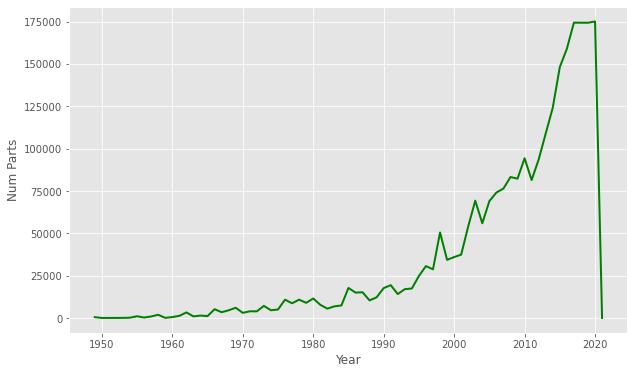

In [575]:
plt.figure(figsize=(10,6))
style.use('ggplot')

part_by_year = df[['year', 'num_parts']].groupby(['year']).sum()

plt.title('')
plt.xlabel('Year')
plt.ylabel('Num Parts')

plt.plot(part_by_year.index, part_by_year['num_parts'], color='g',linewidth=2)

plt.show()

In [576]:
## How many sets the LEGO company has published year-on-year?

In [577]:
sets_by_year = df[['year', 'set_num']].groupby(['year']).count()

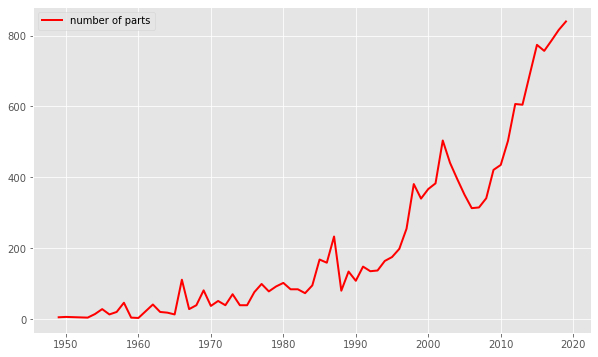

In [578]:
plt.figure(figsize=(10,6))
style.use('ggplot')

plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.plot(sets_by_year.index[:len(sets_by_year)-2], sets_by_year['set_num'][:len(sets_by_year)-2], 'r', linewidth=2, label='number of parts')
plt.legend()
plt.show()

#Note: Ustteki plotta görüldüğü gibi 2020 yılındaki aniden düşüşün sebei aslında 2020 yılındaki veri eksikliği 
#yani o yıla ait verilerin tam olarak datasete girilmemesi bu yüzden veri setinin son 2 rowunu gözardı edip visualization yaparız.

In [579]:
#Sometimes you want to run even more operations based on a particular DataFrame column.
#This is where the .agg() method comes in.

In [580]:
themes_by_year = df.groupby('year').agg({'theme_id':pd.Series.nunique})

In [581]:
#Rename the theme_id column to nr_themes

In [582]:
themes_by_year.rename(columns= {'theme_id':'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


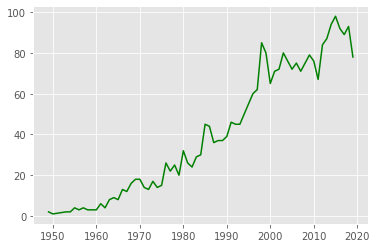

In [583]:
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], 'g-')

Text(0, 0.5, 'Number of themes')

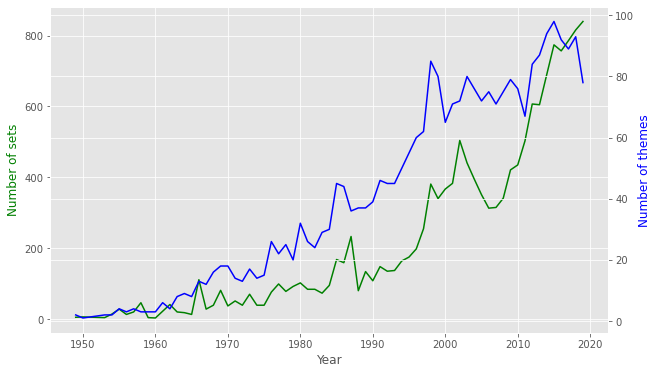

In [584]:
plt.figure(figsize=(10,6))

ax1 = plt.gca()  #get current axis
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='b')   
         
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='g')         
ax2.set_ylabel('Number of themes', color='b')                  

In [585]:
## Average number of parts per LEGO set

In [586]:
#parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})  
#Tek lineda bu şekilde yapılır.Alttaki çözüm mean kullanmadan yaptığım.

In [587]:
relased_parts_by_year = df.groupby('year').agg({'num_parts': pd.Series.count})

In [588]:
total_part_by_year = df[['year', 'num_parts']].groupby('year').sum() 

In [589]:
parts_per_set = total_part_by_year / relased_parts_by_year
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [590]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


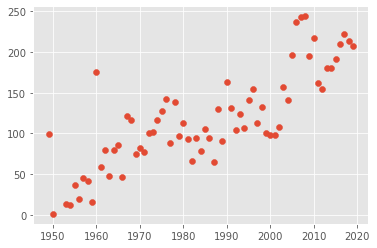

In [591]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2]) #or plt.plot(parts_per_set[:-2], 'r.', markersize=10) 

In [592]:
df['theme_id'].value_counts().head(10)

#Pandas Index.value_counts() function returns object containing counts of unique values. 
#The resulting object will be in descending order so that the first element is the most frequently-occurring element.

158    753
501    656
494    398
435    356
503    329
505    328
497    310
632    299
371    273
516    248
Name: theme_id, dtype: int64

## Relational Database Schemas: Primary and Foreign Keys
<img src='images/rebrickable_schema.png'>

In [593]:
themes_df = pd.read_csv('themes.csv')

In [594]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [595]:
## Search for the name 'Star Wars'. How many ids correspond to the 'Star Wars' name in the themes.csv?

In [596]:
themes_df[themes.name == 'Star Wars']

#star_wars_id = themes_df[['id', 'name']].groupby('name').get_group('Star Wars')  alternative
#star_wars_id   

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [597]:
df[df.theme_id == 18]

#Note: sets.csv deki foreign key olan theme_id, theme.csv deki Star Wars idsine karşılık gelen dataframe gösterimi 
#her bir idyi belirterek gösterilir.Yani 158, 209, 261 değerleride kullanılabilir.

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [598]:
set_theme_count = df['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [599]:
set_theme_count_df = pd.DataFrame({'id': set_theme_count.index,
             'set_count': set_theme_count.values})

In [600]:
set_theme_count_df.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [605]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [601]:
merged_df = pd.merge(set_theme_count_df, themes_df, on='id')
merged_df[:4]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN


In [ ]:
## Using .bar() we can provide our theme names and the number of sets.

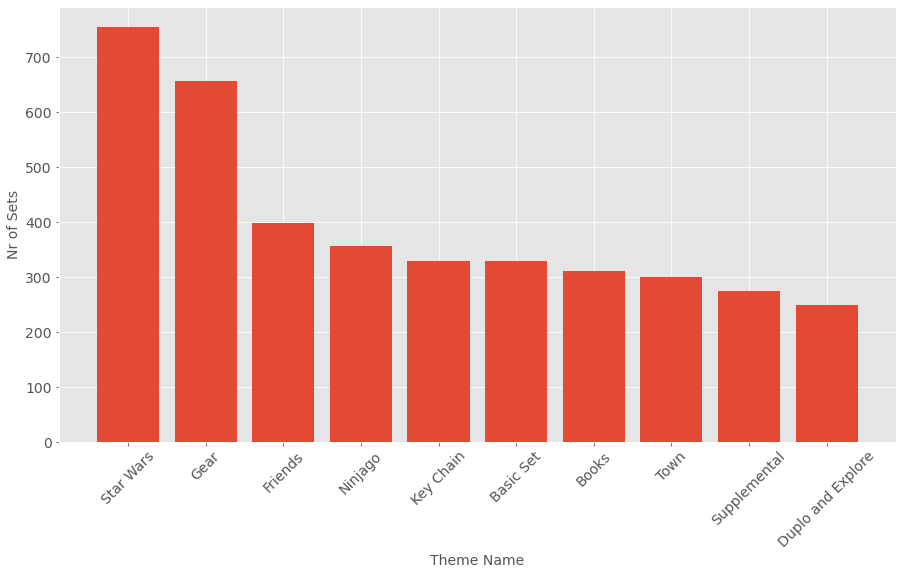

In [604]:
plt.figure(figsize=(15,8))

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.show()